In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, y_true = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42, cluster_std=1.5)

data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
                    
print("Unsupervised Learning Dataset")
print(data.head())

Unsupervised Learning Dataset
   Feature1  Feature2
0 -8.413396  6.935165
1 -5.766484 -6.431171
2 -6.042137 -6.766102
3  3.950837  0.698403
4  4.250492 -0.281545


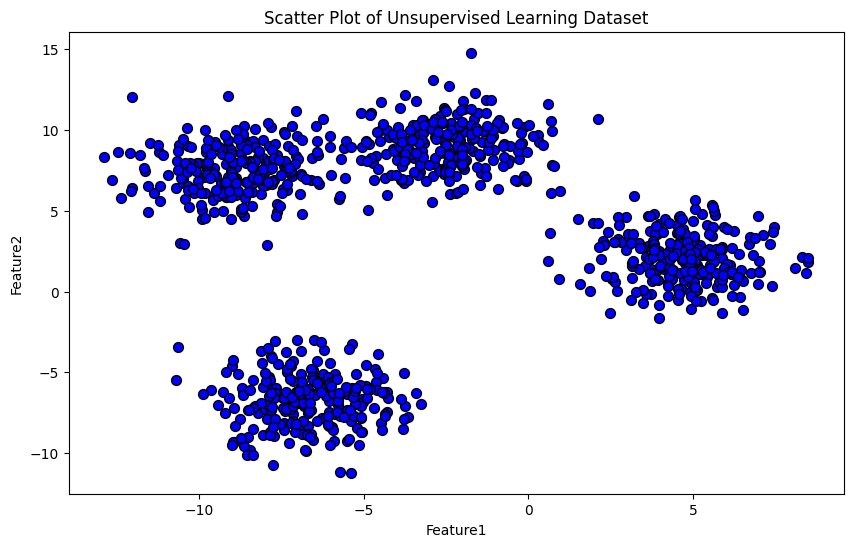

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature1'], data['Feature2'], c='blue', marker='o', edgecolor='black', s=50)
plt.title('Scatter Plot of Unsupervised Learning Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

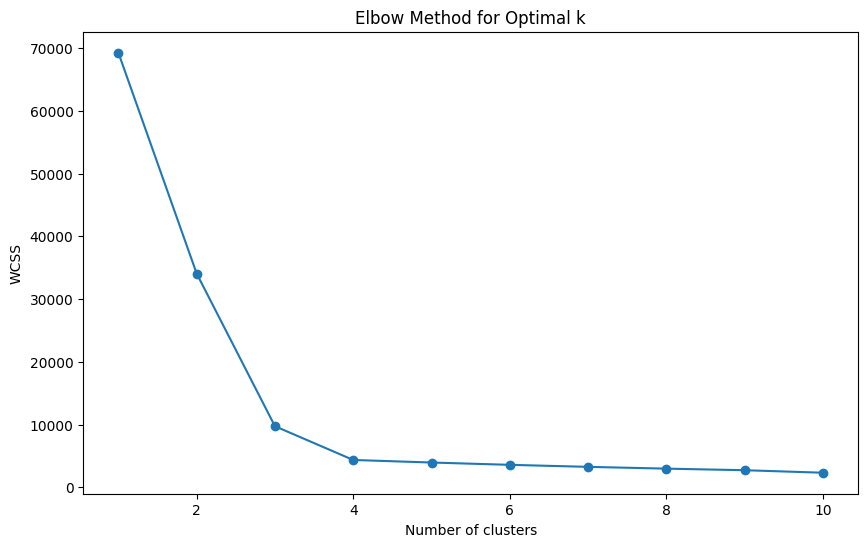

In [17]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

silhouettte_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for k ={optimal_k}: {silhouettte_avg}")

Silhouette Score for k =4: 0.6876600436588094


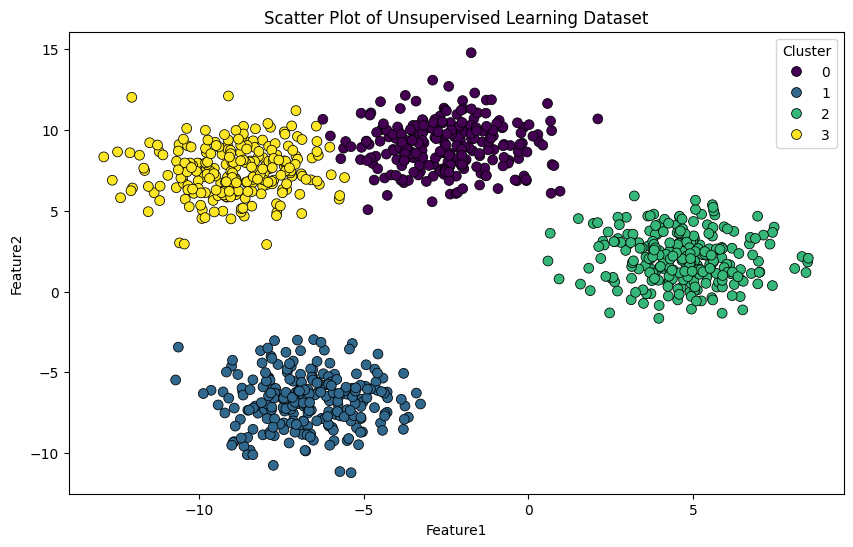

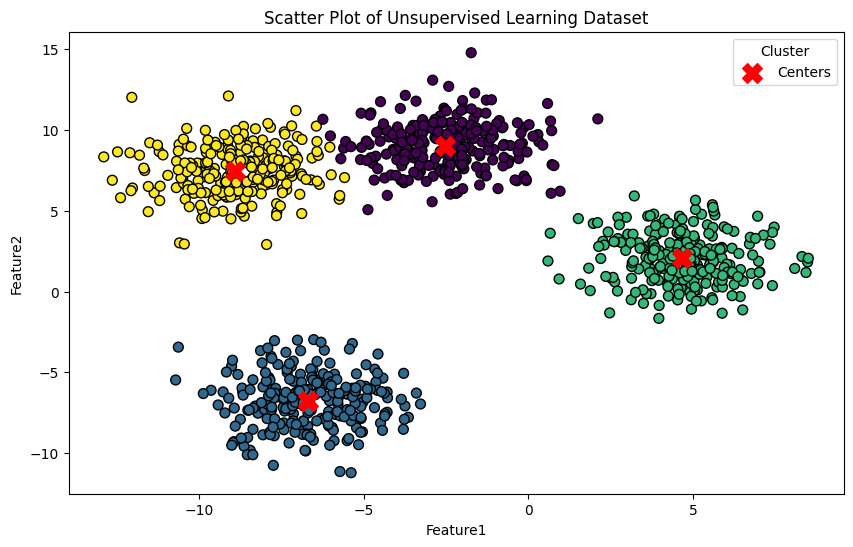

In [51]:
data['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', data=data, palette='viridis', marker='o', edgecolor='black', s=50)
plt.title('Scatter Plot of Unsupervised Learning Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Cluster')
plt.show()

centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature1'], data['Feature2'], c=y_kmeans, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title('Scatter Plot of Unsupervised Learning Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Cluster')
plt.show()